In [2]:
from curses import flash
import os
from pickle import TRUE
from re import L
import requests
import validators
import gzip
import shutil
from urllib.parse import urlparse

import math
import xarray as xa
import numpy as np
from rio_cogeo import cog_validate
import rioxarray

# Mapping
import matplotlib as mpl
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [3]:
f1 = '/home/asubedi/Desktop/Jupyter-Demo/lis_vhrmc_1998_2013_v01.nc'
f1_engine = 'netcdf4'
f1_var = 'VHRMC_LIS_FRD'

f2 = '/home/asubedi/Desktop/Jupyter-Demo/ISS_LIS_SC_V2.1_20221009_095152_NQC.nc'
f2_engine = 'netcdf4'
f2_var = 'VHRMC_LIS_FRD'

f3='/home/asubedi/Desktop/Jupyter-Demo/lis_vhrfc_1998_2013_v01.nc'

In [4]:
file1 = xa.open_dataset(f3, engine=f1_engine, decode_coords='all', decode_times=False)
file2 = xa.open_dataset(f2, engine=f2_engine, decode_coords='all', decode_times=False)

f1inner = file1.VHRFC_LIS_FRD

In [5]:
# print(f1inner)
# print('--------------------')
# print(f1inner.data)
# print('-----------dataTYpe------')
# print(type(f1inner.data))
# print(len(f1inner.data), len(f1inner.data[0]))
# print(f1inner.coords)
# print(f1inner.Longitude)

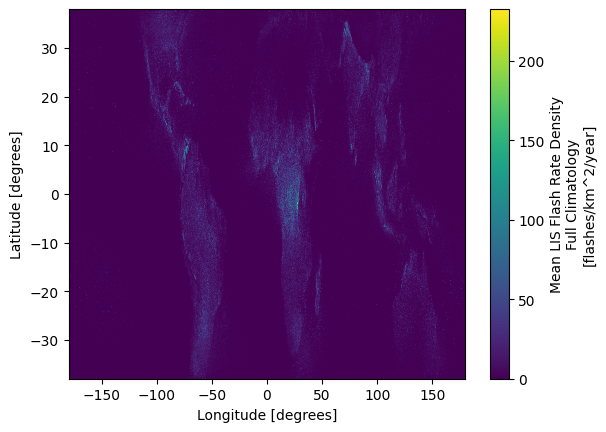

In [6]:
f1inner.plot()

In [7]:
f1inner.rio.set_spatial_dims(x_dim='Latitude', y_dim='Longitude', inplace=True)
f1inner.rio.crs
f1inner.rio.set_crs('epsg:4326', inplace=TRUE)

ERROR 1: PROJ: proj_create_from_database: /home/asubedi/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<xarray.DataArray 'VHRFC_LIS_FRD' (Latitude: 760, Longitude: 3600)>
[2736000 values with dtype=float32]
Coordinates:
  * Longitude  (Longitude) float64 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * Latitude   (Latitude) float64 -37.95 -37.85 -37.75 ... 37.75 37.85 37.95
Attributes:
    units:      flashes/km^2/year
    long_name:  Mean LIS Flash Rate Density Full Climatology

In [8]:
grid = file2.lightning_area_density_index
print(grid)

<xarray.DataArray 'lightning_area_density_index' (area_dim: 79)>
array([27, 99, 99, 83, 99, 91, 78, 90, 99, 89, 99, 64, 36, 99, 99, 75, 40, 67,
       85, 99, 99, 99, 46, 99, 99, 98, 99, 99, 99, 50, 93, 37, 98, 52, 41, 99,
       99, 99, 99, 80, 99, 99, 76, 99, 99, 90, 82, 53, 57, 57, 53, 72, 76, 36,
       88, 89, 93, 84, 71, 93, 78, 64, 74, 45, 99, 64, 71, 55, 99, 99, 42, 83,
       55, 51, 70, 96, 99, 99, 99], dtype=int8)
Coordinates:
    lightning_area_TAI93_time    (area_dim) float64 ...
    lightning_area_delta_time    (area_dim) float32 ...
    lightning_area_observe_time  (area_dim) int16 ...
    lightning_area_lat           (area_dim) float32 ...
    lightning_area_lon           (area_dim) float32 ...
Dimensions without coordinates: area_dim
Attributes:
    units:      1
    long_name:  area lightning activity
    comment:    spatial density metric; higher if area geolocated in a region...


In [9]:
data = grid.data
lon = grid.lightning_area_lon
lat1 = grid.lightning_area_lat

In [31]:
lat = np.copy(file2.lightning_area_density_index.lightning_area_lat.data)
lon = np.copy(file2.lightning_area_density_index.lightning_area_lon.data)

# lon.sort()
# lat.sort()

print(lat)
print(lon)

[-32.64005    -22.585123   -22.79138    -22.835232   -22.508034
 -22.919497   -22.849932   -21.831388   -22.848764   -22.725935
 -22.279345   -22.598967   -22.785217   -22.362059   -22.024673
 -21.96413    -22.37105    -22.522861   -23.023867   -18.37313
 -18.922062   -18.66491    -17.993399   -17.830944   -17.384418
 -17.58368    -17.899183   -17.296066   -17.699913   -17.948427
 -18.466703   -19.401522   -14.261918   -14.256058   -14.596655
 -11.127629   -10.872292   -11.310815   -11.014904   -10.557531
 -11.50606    -11.068722    -8.814188    -9.487838    -8.639648
  -9.145166    -9.263236    -7.6628823  -10.147221   -10.050094
   5.6397      41.90998     41.976803    31.362461    30.29162
  30.23578     30.233423    30.496832    29.800188    21.047134
  15.349834    14.727493    13.955233    12.1564      10.155121
   8.166153     9.828748     6.713972     1.5832638    1.3992645
   7.1266856    1.079803    -0.4387343   -0.36632296  -2.7057607
  -7.1136317  -11.639885   -11.8428545  

In [11]:
lat_len = len(grid.lightning_area_lat)
lon_len = len(grid.lightning_area_lat)

In [12]:
npData = np.zeros((lat_len, lon_len))

In [13]:
index = 0
for i in range (lat_len):
    for j in range(lon_len):
        if(i == j):
            npData[i][j] = data[index]
            index = index + 1

In [21]:
finalFile = xa.DataArray(
    data = npData,
    dims=("Latitude", "Longitude"),
    coords={
        "Latitude":lat,
        "Longitude":lon
    },
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

In [28]:
finalFile = finalFile.transpose('Latitude', 'Longitude')
finalFile.rio.set_spatial_dims(x_dim='Longitude', y_dim='Latitude', inplace=True)
finalFile.rio.crs
finalFile.rio.set_crs('epsg:4326', inplace=TRUE)
#finalFile.plot()

ERROR 1: PROJ: proj_create_from_database: /home/asubedi/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<xarray.DataArray (Latitude: 79, Longitude: 79)>
array([[27.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 99.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 99., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 99.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 99.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 99.]])
Coordinates:
  * Latitude   (Latitude) float32 -32.64 -22.59 -22.79 ... -11.64 -11.84 -22.53
  * Longitude  (Longitude) float32 -67.6 -56.54 -56.59 ... 132.0 132.0 146.1
Attributes:
    description:  Ambient temperature.
    units:        degC

In [30]:
# cog_name = 'S2A_20160724_135032_27XVB_B02.tif'
# cog_path = f'/home/asubedi/Desktop/Jupyter-Demo/cogs/{cog_name}'
# finalFile.rio.to_raster(rf'{cog_path}', driver='COG')

finalFile.to_netcdf('alan.nc')